<a href="https://colab.research.google.com/github/MIHIR-110103/Gaussian-Naive-Bayes-Classifier/blob/main/Naive_Bayes_Classification_(Social_Network_Ads).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

---






In [2]:
data=pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Data Preprocessing

---






<Axes: >

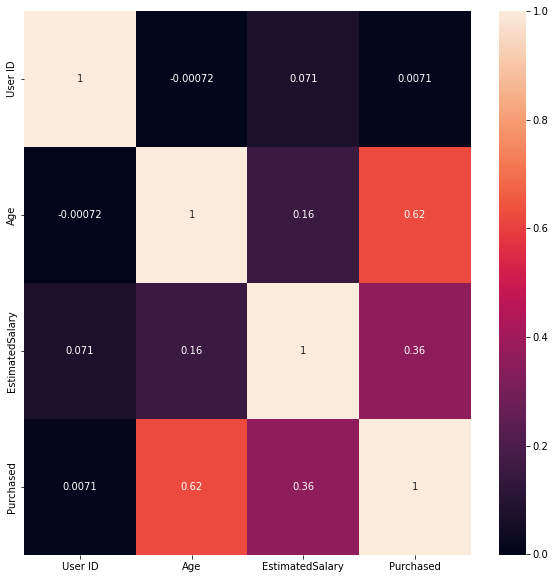

In [6]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [7]:
df=pd.DataFrame(data)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Training Testing Split

---






In [145]:
X=df.drop(['User ID','Purchased'],axis =1)
Y=df['Purchased']

In [146]:
from sklearn.model_selection import train_test_split 

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

# Gaussian Naive Bayes Classification

---






In [148]:
# There are 3 types of Naive Bayes Clf:- 1)Bernoulli  2)Gaussian  3)Multinomial
from sklearn.naive_bayes import GaussianNB

In [149]:
GauNB = GaussianNB()

GauNB.fit(X_train,Y_train)

GaussianNB()

In [150]:
Y_pred = GauNB.predict(X_test)

# Accuracy Testing

---


In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [152]:
print(f"testing accuracy = {accuracy_score(Y_test,Y_pred)}")

testing accuracy = 0.95


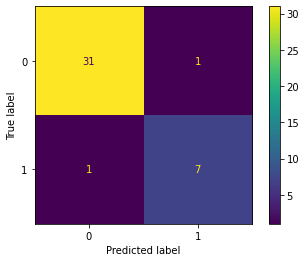

In [153]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [154]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40

